# Binomial Tree Lattice

In [3]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta


# DARK Monokai Theme for jupyter notebook
###################################################################################################
# from jupyterthemes import get_themes
# from jupyterthemes.stylefx import set_nb_theme
# set_nb_theme('monokai')
# ####################################################################################################


* Stock trees can be represented using nodes (𝑖,𝑗)

* intial stock price $𝑆_0$


$$ S_{i,j} = S_{0}.u_j.d_i$$

WHERE,

> $C_{i,j}$ : represents option (European Call) price at each node (𝑖,𝑗).

> Where $𝐶_{𝑁,𝑗}$ represents final payoff function that we can define.

Simulating a European Call, so $𝐶_{𝑁,𝑗} =𝑚𝑎𝑥((𝑆_{𝑁,𝑗}−𝐾),0)$

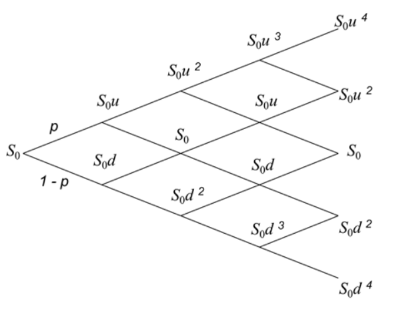

#### Initialise parameters

In [8]:
S = 50     #underlying
K = 100      #strike
T = 0.5         #Time to Expiry
r = 0.06       #risk free rate
steps = 30       #no. of steps
u = 1.1       #up factor : risk neutral prob of going up
d= 1/u        # risk neutral prob of going down
optionType = 'call'

#### Formulas

Discount Factor :    
$$df= e^{-rt}$$

$$q= \frac{(e^{r\cdot d_t} - d)}{u-d}$$

$$C = \frac{1}{e^{r\cdot t}}. \left[ q.C_u + (1-q).C_d  \right]$$

In [9]:

def binomial_lattice(S, K, time, r, steps, u, d, optionType='call'):
    #precompute constants
    dt = time/steps
    q = (np.exp(r*dt) - d) / (u-d)
    df = np.exp(-r*dt)
    
    # we have tp go backwardds in lattice. SO, initialise asset prices at maturity - Time step N
    # hint: look at the lattic. s.d^4, s.d^3.u^1........
    C = S * (d ** (np.arange(steps,-1,-1))) * (u ** (np.arange(0,steps+1,1))) 
    # initialise option values at maturity  as per 𝐶𝑁,𝑗=𝑚𝑎𝑥((𝑆𝑁,𝑗−𝐾),0)
    C = np.maximum( C - K , np.zeros(steps+1) )
        
    # step backwards through tree
    for i in np.arange(steps,0,-1):
        C = df * ( q * C[1:i+1] + (1-q) * C[0:i] )
    
    return C[0]
    

In [7]:
binomial_lattice(S, K, T, r, steps, u, d, optionType='call')


1.7360374238785106